In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
df_1 = pd.read_csv("./radius.csv")
df_2 = pd.read_csv("./opening_mouth.csv")
df = df_1.merge(df_2, on = "Structure", how = "inner")
feature_names = ["Average_radius", "Max_radius", "Min_radius", "Inner_mouth_radius", "Outer_mouth_radius"]

print(df.head())
X = df[feature_names]
y = df["Channel_x"]
y = y.map({'KCN': 1, 'SCN': 0}).astype(int)

  Structure Channel_x  Average_radius  Max_radius  Min_radius Channel_y  \
0      6LQA       SCN        8.537306   11.731484    5.205416       SCN   
1      6UZ0       SCN        6.744045    8.786804    4.434245       SCN   
2      6UZ3       SCN        6.914551    9.164094    4.107844       SCN   
3      7DTC       SCN        7.601429   12.130650    4.602573       SCN   
4      7FBS       SCN        6.818366    8.717081    4.355920       SCN   

   Inner_mouth_radius  Outer_mouth_radius  
0           10.505120           19.129240  
1            6.127747           18.962031  
2            6.279441           19.101945  
3           10.516912           19.061831  
4            6.191539           18.944065  


In [4]:
# standarize data

scalar = StandardScaler()
X = scalar.fit_transform(X)

# Decision Tree

In [5]:
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)

In [6]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= -0.39
|   |--- class: 1
|--- feature_4 >  -0.39
|   |--- feature_1 <= 0.90
|   |   |--- class: 0
|   |--- feature_1 >  0.90
|   |   |--- class: 1



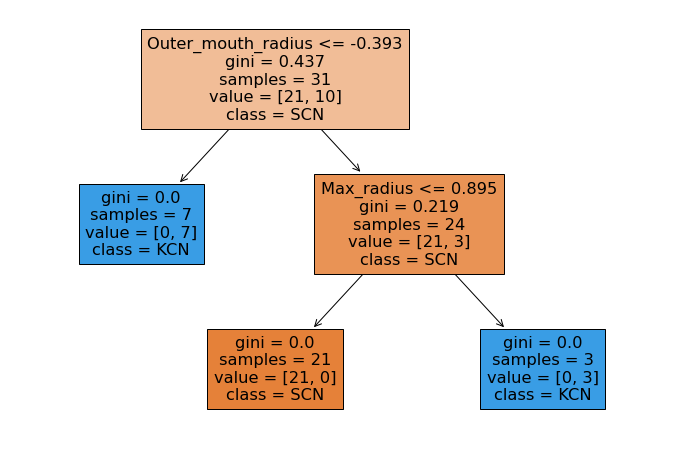

In [7]:
fig = plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf, feature_names=feature_names, class_names=df["Channel_x"].unique(), filled=True)

Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


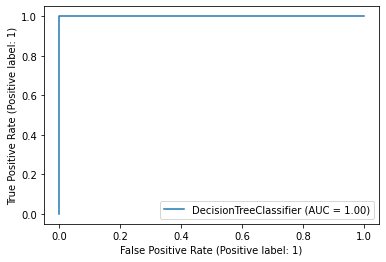

In [8]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# Logistic Regression

In [9]:
clf = LogisticRegression(random_state=0)
model = clf.fit(X, y)

Feature weights:
['Average_radius: 0.18899762552002286', 'Max_radius: 1.4753341417165196', 'Min_radius: -0.3510897885301796', 'Inner_mouth_radius: -0.28142977447027384', 'Outer_mouth_radius: -1.6732385527892502']


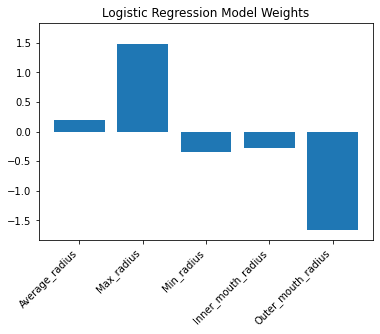

In [10]:
# Print feature weights

print("Feature weights:")
print([feature_names[i] + ": " + str(clf.coef_[0][i]) for i in range(clf.coef_[0].shape[0])])

weights = clf.coef_[0]
labels = feature_names
wLim = np.max(np.abs(weights)) *1.1
plt.figure()
plt.bar(labels, weights)
plt.title('Logistic Regression Model Weights')
plt.xticks(rotation=45, ha="right")
plt.ylim([-wLim, wLim])
plt.show()

Accuracy: 0.967741935483871
Recall: 0.9
F1: 0.9473684210526316


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


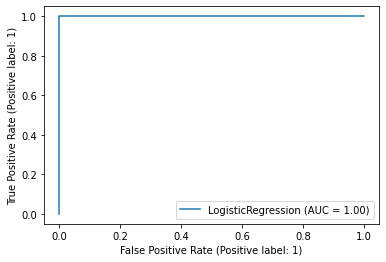

In [11]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# SVC rbf

In [12]:
clf = SVC(random_state=0)
model = clf.fit(X, y)

In [13]:
# TODO: Represent SVC for how it makes decisions

Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


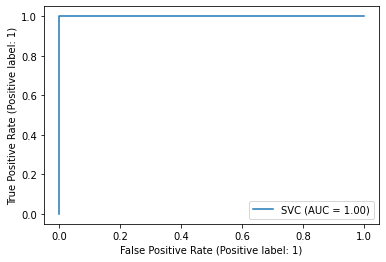

In [14]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# Linear SVC

In [15]:
clf = SVC(random_state=0, kernel='linear')
model = clf.fit(X, y)


Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


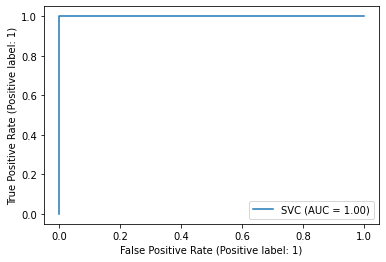

In [16]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

Feature weights:
['Average_radius: 0.05442165813983335', 'Max_radius: 1.3118670178978555', 'Min_radius: 0.1120500902993069', 'Inner_mouth_radius: -0.06939001225520422', 'Outer_mouth_radius: -1.7837413438535907']


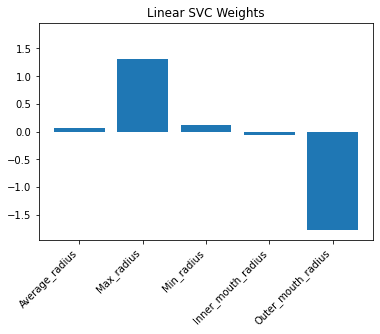

In [18]:
print("Feature weights:")
print([feature_names[i] + ": " + str(clf.coef_[0][i]) for i in range(clf.coef_[0].shape[0])])

weights = clf.coef_[0]
labels = feature_names
wLim = np.max(np.abs(weights)) *1.1
plt.figure()
plt.bar(labels, weights)
plt.title('Linear SVC Weights')
plt.xticks(rotation=45, ha="right")
plt.ylim([-wLim, wLim])
plt.show()